In [55]:
from ord.analysis.ord2dataframe import json_logs_to_dataframe
import json
import pandas as pd
import _collections

result_dir = '/Users/ob/data/results/ml_from_scratch/'
result_json = 'PytorchTrainer_MLPModel_SyntheticDataset_d.b=2_td.b=2_vd.b=2_201108_1820.json'
result_json = 'PytorchTrainer_MLPModel_SyntheticDataset_d.b=10_t.e=1000_t.o.lr=0.0001_td.b=20_vd.b=20_201109_1334'
#results = json_logs_to_dataframe('/Users/ob/data/results/ml_from_scratch/PytorchTrainer_MLPModel_SyntheticDataset_d.b=2_td.b=2_vd.b=2_201108_1234.json')

In [56]:
with open(result_dir+result_json) as fh:
    resultsj = json.load(fh)

In [50]:
resultsj

{'_id': 'PytorchTrainer_MLPModel_SyntheticDataset_d.b=10_t.e=100_td.b=20_vd.b=20_201108_1844',
 'metadata': {'user': 'obajgar',
  'host': 'Scotts-MBP',
  'argv': ['/Users/ob/Sync/dev/aims/aims-4-machine-learning/experiments/synthetic_experiment.py',
   '-d.b',
   '10',
   '-td.b',
   '20',
   '-vd.b',
   '20',
   '-t.e',
   '100',
   '-o.lr',
   '0.001'],
  'init_time': '20/11/08 18:44:44',
  'ord_collection': 'ml_fscratch_results',
  'repository': 'gitlab.com/obajgar/aims-4-machine-learning',
  'revision_hash': '2b7e32f',
  'submission_time': '20/11/08 18:44:45',
  'duration': 0.0930778980255127},
 'results': [{'val_mean_square_error': 1.6933155059814453,
   'epoch': 0,
   'iteration': 0,
   'tot_iter': 0,
   'duration_total': 0.016371965408325195,
   'duration_delta': 0.016371965408325195},
  {'test_mean_square_error': 1.320133924484253,
   'epoch': 0,
   'iteration': 0,
   'tot_iter': 0,
   'duration_total': 0.016562938690185547,
   'duration_delta': 0.00019097328186035156},
  {'tra

In [57]:
def extract_df(json_dict, cols, index='tot_iter'):
    index_dict = _collections.defaultdict(lambda : {})
    for result in json_dict:
        for k, v in result.items():
            if k in cols:
                index_dict[result[index]][k] = result[k]
    return index_dict

new_results = extract_df(resultsj['results'], cols=['train_mean_square_error','val_mean_square_error','test_mean_square_error'])


In [40]:
print(new_results)

defaultdict(<function extract_df.<locals>.<lambda> at 0x7fa163a04ee0>, {0: {'val_mean_square_error': 2.588376958668232, 'test_mean_square_error': 3.488889369368553}, 10: {'train_mean_square_error': 2.692375326156616, 'val_mean_square_error': 1.513409902714193, 'test_mean_square_error': 2.3398154739290478}, 20: {'train_mean_square_error': 1.6782400824129582, 'val_mean_square_error': 0.6951288253068924, 'test_mean_square_error': 1.1325421720743178}, 30: {'train_mean_square_error': 1.8289670035243035, 'val_mean_square_error': 2.0363624811172487, 'test_mean_square_error': 1.9209631718695164}, 40: {'train_mean_square_error': 3.3104753628373147, 'val_mean_square_error': 2.813978511095047, 'test_mean_square_error': 2.4888766705989838}, 50: {'train_mean_square_error': 2.569844402372837, 'val_mean_square_error': 1.1132396216038614, 'test_mean_square_error': 1.3087972241919488}, 60: {'train_mean_square_error': 1.4629417330026626, 'val_mean_square_error': 1.0839827746152877, 'test_mean_square_err

In [60]:
res_df = pd.DataFrame.from_dict(new_results, orient='index')

In [61]:
res_df

val_mean_square_error  test_mean_square_error  train_mean_square_error
0                 1.271657                0.974433                      NaN
2                 1.209359                0.927388                 1.151963
4                 1.089188                0.836583                 1.077392
6                 0.917132                0.706421                 0.953379
8                 0.708880                0.548564                 0.799254
..                     ...                     ...                      ...
192               0.727219                0.518239                 0.764076
194               0.511259                0.361346                 0.583360
196               0.310025                0.215965                 0.404027
198               0.149559                0.101268                 0.222881
200               0.046383                0.029445                 0.098015

[101 rows x 3 columns]

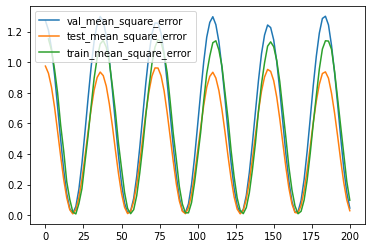

In [62]:
res_df.plot()

In [68]:
def plot_results(exp_name):
    json_name = exp_name+'.json'
    with open(result_dir+json_name) as fh:
        res_full_dict = json.load(fh)    
    results = extract_df(res_full_dict['results'], cols=['train_mean_square_error','val_mean_square_error','test_mean_square_error'])
    res_df = pd.DataFrame.from_dict(results, orient='index')
    res_df.plot()

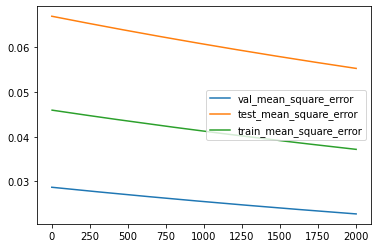

In [71]:
result_json = 'PytorchTrainer_MLPModel_SyntheticDataset_d.b=10_t.e=1000_t.o.lr=0.0001_td.b=20_vd.b=20_201109_1413_001'
plot_results(result_json)

In [91]:
import struct
import numpy as np
import gzip

with gzip.open('/Users/ob/data/datasets/vision/MNIST/t10k-images-idx3-ubyte.gz','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))

ValueError: cannot reshape array of size 1648861 into shape (10000,28,28)

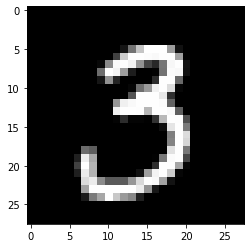

In [86]:
import matplotlib.pyplot as plt
plt.imshow(data[90,:,:], cmap='gray')
plt.show()

In [87]:
with open('/Users/ob/data/datasets/vision/MNIST/t10k-labels-idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))

In [88]:
labels[90]

3

In [90]:
a = np.zeros((3,5))
a[np.arange(3),[2,0,4]]=1
a

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])